# pandasを用いたデータ分析サンプル

pandasに備わったAPIを活用したデータ分析の動作確認．  

動作確認で使用するデータは，scikit-learnを用いて取得可能なひとつであるボストン住宅価格データセットを使用する．

## モジュールのインストール

In [1]:
!pip install pandas
!pip install matplotlib
!pip install scikit-learn

## モジュールのインポート

In [2]:
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns

## データセット読み込み

In [3]:
dataset_boston = load_boston()
dataset_boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
df_dataset_boston_data = pd.DataFrame(dataset_boston['data'], columns=dataset_boston['feature_names'])
df_dataset_boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
TARGET_TAG = 'SalePrice'
df_dataset_boston_target = pd.DataFrame(dataset_boston['target'], columns=[TARGET_TAG])
df_dataset_boston_target.head()

,SalePrice
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [6]:
df_dataset_boston = pd.concat([df_dataset_boston_data, df_dataset_boston_target], axis=1)
df_dataset_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## データ分析用APIの動作確認

### 要約([pandas.DataFrame.describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html))

データセットの要約を確認するための統計量を算出するAPI．

|算出するパラメータ|説明|
|:--|:--|
|count|データ数|
|mean|平均|
|std|標準偏差|
|min|最小値|
|25%|$\frac{1}{4}$分位|
|50%|$\frac{1}{2}$分位(=中央値)|
|75%|$\frac{3}{4}$分位|
|max|最大値|

In [7]:
df_dataset_boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### 作図([pandas.DataFrame.plot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html))

SeriesまたはDataFrameのグラフを作成できる．  
デフォルトはmatplotlibだが，plotting.backendで使用する作図モジュールを指定することもできる．

<AxesSubplot:xlabel='CRIM', ylabel='SalePrice'>

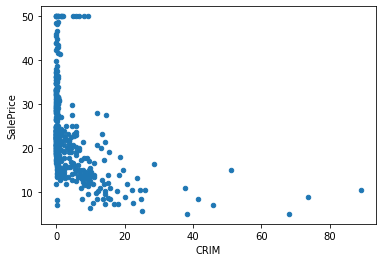

In [8]:
var = 'CRIM'
plot_data = pd.concat([df_dataset_boston_target[TARGET_TAG], df_dataset_boston_data[var]], axis=1)
plot_data.plot.scatter(x=var, y=TARGET_TAG)

### 相関分析([pandas.DataFrame.corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html))

pandasにはデータ間の相関係数を算出することができる．  
相関分析手法は，ピアソン，ケンドール，スピアマンから選択可能で，デフォルトはピアソンである．

DataFrameの各データ間の相関係数を相関マトリクスとして得ることができる．

<AxesSubplot:>

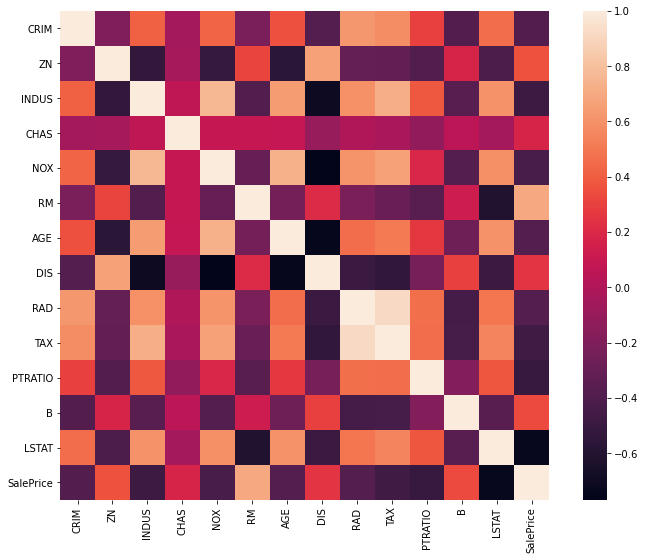

In [9]:
corrmat = df_dataset_boston.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True)